# P&D Explanatory Data Analysis

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data file
df = pd.read_csv("pnd_features_new.csv", parse_dates=['Date'],index_col = ['Date'])

In [3]:
df.head()

,Channel,Currency,Exchange,Duration,Volume,Price before pump,Max price,Our buy price,Our profit,Theoretical buy price,...,2018year,2019year,2020year,2021year,AM,month_cos,month_sin,hour_cos,hour_sin,channel
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-17 19:45:02+00:00,Tornado Signals,BNBX,Yobit,1:31,0.12,1.027000e-05,2.300000e-05,1.900000e-05,21.05%,1.899000e-05,...,1,0,0,0,0,-1.0,1.224647e-16,0.460065,-0.887885,0
2018-06-18 19:45:03+00:00,Tornado Signals,RR,Yobit,0:09,0.16,4.600000e-07,1.800000e-06,1.390000e-06,29.50%,1.390000e-06,...,1,0,0,0,0,-1.0,1.224647e-16,0.460065,-0.887885,0
2018-06-19 15:53:52+00:00,Crypto Signal Crazy Community?,XVG,Bittrex,9:46,6.70,4.490000e-06,4.490000e-06,4.480000e-06,0.22%,4.490000e-06,...,1,0,0,0,0,-1.0,1.224647e-16,-0.576680,-0.816970,1
2018-06-19 19:45:02+00:00,Tornado Signals,WIT,Yobit,0:05,0.16,1.000000e-07,4.500000e-07,3.100000e-07,45.16%,2.200000e-07,...,1,0,0,0,0,-1.0,1.224647e-16,0.460065,-0.887885,0
2018-06-20 15:00:17+00:00,Crypto Pump Island,TRK,Cryptopia,1:02,0.25,4.300000e-07,7.700000e-07,6.600000e-07,16.67%,4.900000e-07,...,1,0,0,0,0,-1.0,1.224647e-16,-0.576680,-0.816970,2


In [4]:
print('The dataset has {} P&Ds'.format(df.shape[0]))

The dataset has 1222 P&Ds


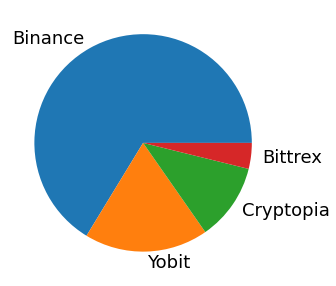

In [5]:
# the ratio of each exchange
plt.rcParams["font.size"] = 18
exchange = df['Exchange'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(exchange, labels=exchange.index)
plt.savefig('img2/exchange.jpg', bbox_inches='tight')
plt.rcParams["font.size"] = 12

In [6]:
# average price hike for each exchange
print('Overall: {}'.format(df['theoretical_return'].mean()))
pos = (df[df['theoretical_return']>1].shape[0]/df.shape[0])*100
print('Positive return {}%'.format(pos))
for i in df['Exchange'].unique():
    print(i)
    print(df['theoretical_return'][df['Exchange']==i].mean())

Overall: 1.2971124386252046
Positive return 89.68903436988543%
Yobit
1.8919915555555553
Bittrex
1.1976893617021278
Cryptopia
1.6587585714285715
Binance
1.0751304938271604


In [7]:
# average traded volume for each exchange
for i in df['Exchange'].unique():
    print(i)
    print(df['relative_volume'][df['Exchange']==i].mean())

Yobit
124063.62875567013
Bittrex
3835107.0282280343
Cryptopia
1205815.3536716492
Binance
33758074.58216589


In [8]:
# average price hike for each exchange
df['year'] = df.index.year
for i in df['year'].unique():
    print(i)
    print(df['theoretical_return'][df['year']==int(i)].mean())

2018
1.4668107623318385
2019
1.4297449893390193
2020
1.0765006269592476
2021
1.1564857819905214


In [9]:
# volume (in BTC) sumamry 
df['Volume'].describe()

count    1222.000000
mean       66.542930
std       291.703044
min         0.000000
25%         0.492500
50%         5.185000
75%        36.517500
max      6683.360000
Name: Volume, dtype: float64

In [10]:
# the ration of P&D less than 1 BTC volume
df[df['Volume']<1].shape[0]/df.shape[0]

0.2986906710310966

In [11]:
# import BTC price data from CoinMarketCap
btc = pd.read_csv('btc_price.csv', parse_dates=['date'],index_col = ['date']) 

In [12]:
def cleaning(text):
    text = text.replace('$', '')
    text = text.replace(',', '')
    text = text.replace(' ', '')
    return float(text)

In [13]:
btc.head()

,open,high,low,close,volume,capital
date,,,,,,
2021-03-31,"$58,930.28","$59,930.03","$57,726.42","$58,918.83","$65,520,826,225","$1,100,016,786,763"
2021-03-30,"$57,750.13","$59,447.22","$57,251.55","$58,917.69","$54,414,116,432","$1,099,939,890,804"
2021-03-29,"$55,947.90","$58,342.10","$55,139.34","$57,750.20","$57,625,587,027","$1,078,088,296,477"
2021-03-28,"$55,974.94","$56,610.31","$55,071.11","$55,950.75","$47,686,580,918","$1,044,446,559,059"
2021-03-27,"$55,137.57","$56,568.22","$54,242.91","$55,973.51","$47,266,542,233","$1,044,814,147,412"


In [14]:
# clean the data
btc['close'] = btc['close'].apply(lambda x: cleaning(x))

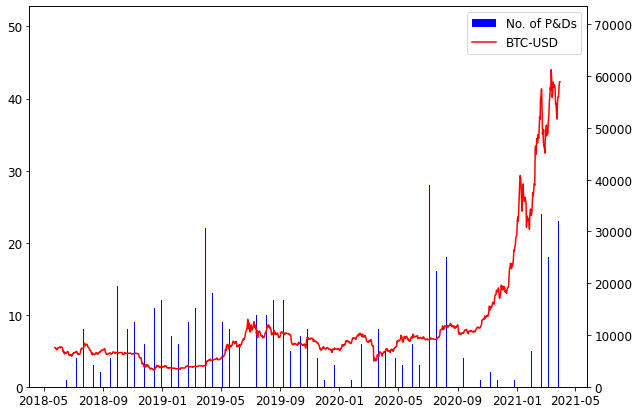

In [15]:
import matplotlib.dates as mdates
# get time series data
df['count'] = 1
df_week = df.resample('W').sum() 
fig, ax1 = plt.subplots(figsize=(10,7))
ax2 = ax1.twinx()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n %Y'))
ax1.bar(df_week.index, df_week['count'], color='b', label='No. of P&Ds')
ax2.plot(btc.index, btc['close'], color='r', label='BTC-USD')
max1 = 1.2 * max(df_week['count'])
max2 = 1.2 * max(btc['close'])
handle1, label1 = ax1.get_legend_handles_labels()
handle2, label2 = ax2.get_legend_handles_labels()
ax2.legend(handle1 + handle2, label1 + label2, loc='best')
ax1.set_ylim([0, max1])
ax2.set_ylim([0, max2])
plt.savefig('img2/time-series.jpg')

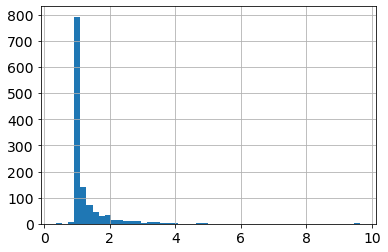

In [16]:
# theoretical return
plt.figure(figsize=(6, 4))
plt.hist(df['theoretical_return'], bins =50)
plt.xlabel('')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('img2/theoretical_return.jpg')

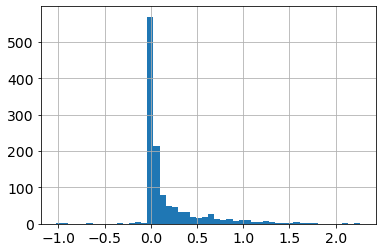

In [17]:
# log theoretical profit
plt.figure(figsize=(6, 4))
plt.hist(np.log(df['theoretical_return']), bins =50)
plt.xlabel('')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('img2/theoretical_logreturn.jpg')

In [18]:
# check the skewness and kurtosis
print(df['theoretical_return'].skew())
print(df['theoretical_return'].kurtosis())
print(np.log(df['theoretical_return']).skew())
print(np.log(df['theoretical_return']).kurtosis())

5.660016371317355
46.59649330579299
2.4445041245779335
7.723949826187809


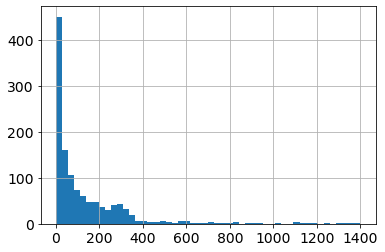

In [19]:
# duration
plt.figure(figsize=(6, 4))
plt.hist(df['duration'], bins = 50)
plt.xlabel('')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('img2/duration.jpg')

In [20]:
# the maximum volume
df[['Volume', 'Price before pump']][df['relative_volume']==df['relative_volume'].max()] 

,Volume,Price before pump
Date,,
2019-03-17 03:27:32+00:00,2554.99,2.000000e-07


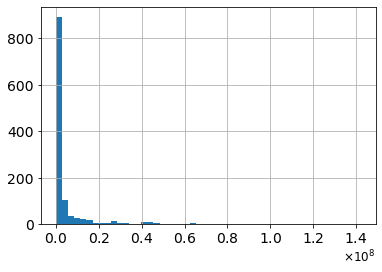

In [21]:
# volume
import matplotlib.ticker as ptick
fig, ax = plt.subplots(figsize=(6, 4))
# take out top 15 outliers 
ax.hist(df['relative_volume'][df['relative_volume']<1.5*(10**8)], bins =50)
ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
# ax.xlabel('')
ax.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('img2/volume.jpg')

In [22]:
# time zone
df_dates = df.set_index([df.index.year, df.index.month, df.index.day, df.index.weekday,
                            df.index.hour, df.index])
df_dates.index.names = ['year', 'month', 'day','weekday', 'hour', 'date']
df_dates.head()

Channel  \
year month day weekday hour date                                                        
2018 6     17  6       19   2018-06-17 19:45:02+00:00                 Tornado Signals   
           18  0       19   2018-06-18 19:45:03+00:00                 Tornado Signals   
           19  1       15   2018-06-19 15:53:52+00:00  Crypto Signal Crazy Community?   
                       19   2018-06-19 19:45:02+00:00                 Tornado Signals   
           20  2       15   2018-06-20 15:00:17+00:00              Crypto Pump Island   

                                                      Currency   Exchange  \
year month day weekday hour date                                            
2018 6     17  6       19   2018-06-17 19:45:02+00:00     BNBX      Yobit   
           18  0       19   2018-06-18 19:45:03+00:00       RR      Yobit   
           19  1       15   2018-06-19 15:53:52+00:00      XVG    Bittrex   
                       19   2018-06-19 19:45:02+00:00      WIT      Yobit   
           20  2       15   2018-06-20 15:00:17+00:00      TRK  Cryptopia   

                                                      Duration  Volume  \
year month day weekday hour date                                         
2018 6     17  6       19   2018-06-17 19:45:02+00:00     1:31    0.12   
           18  0       19   2018-06-18 19:45:03+00:00     0:09    0.16   
           19  1       15   2018-06-19 15:53:52+00:00     9:46    6.70   
                       19   2018-06-19 19:45:02+00:00     0:05    0.16   
           20  2       15   2018-06-20 15:00:17+00:00     1:02    0.25   

                                                       Price before pump  \
year month day weekday hour date                                           
2018 6     17  6       19   2018-06-17 19:45:02+00:00       1.027000e-05   
           18  0       19   2018-06-18 19:45:03+00:00       4.600000e-07   
           19  1       15   2018-06-19 15:53:52+00:00       4.490000e-06   
                       19   2018-06-19 19:45:02+00:00       1.000000e-07   
           20  2       15   2018-06-20 15:00:17+00:00       4.300000e-07   

                                                          Max price  \
year month day weekday hour date                                      
2018 6     17  6       19   2018-06-17 19:45:02+00:00  2.300000e-05   
           18  0       19   2018-06-18 19:45:03+00:00  1.800000e-06   
           19  1       15   2018-06-19 15:53:52+00:00  4.490000e-06   
                       19   2018-06-19 19:45:02+00:00  4.500000e-07   
           20  2       15   2018-06-20 15:00:17+00:00  7.700000e-07   

                                                       Our buy price  \
year month day weekday hour date                                       
2018 6     17  6       19   2018-06-17 19:45:02+00:00   1.900000e-05   
           18  0       19   2018-06-18 19:45:03+00:00   1.390000e-06   
           19  1       15   2018-06-19 15:53:52+00:00   4.480000e-06   
                       19   2018-06-19 19:45:02+00:00   3.100000e-07   
           20  2       15   2018-06-20 15:00:17+00:00   6.600000e-07   

                                                      Our profit  \
year month day weekday hour date                                   
2018 6     17  6       19   2018-06-17 19:45:02+00:00     21.05%   
           18  0       19   2018-06-18 19:45:03+00:00     29.50%   
           19  1       15   2018-06-19 15:53:52+00:00      0.22%   
                       19   2018-06-19 19:45:02+00:00     45.16%   
           20  2       15   2018-06-20 15:00:17+00:00     16.67%   

                                                       Theoretical buy price  \
year month day weekday hour date                                               
2018 6     17  6       19   2018-06-17 19:45:02+00:00           1.899000e-05   
           18  0       19   2018-06-18 19:45:03+00:00           1.390000e-06   
           19  1       15   2018-06-19 15:53:52+00:00         

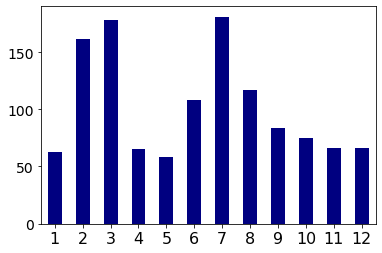

In [23]:
# sorted by month
plt.rcParams["font.size"] = 14
month = df_dates['count'].sum(level='month').sort_index()
plt.figure(figsize=(6, 4))
fig = month.plot.bar(color='navy')
plt.xticks(rotation=0.45, fontsize=16)
plt.xlabel('')
plt.savefig('img2/month.jpg')

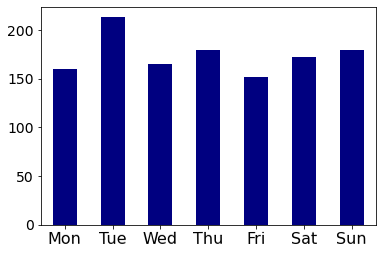

In [24]:
# sorted by weekday
weekday = df_dates['count'].sum(level='weekday').sort_index()
weekday = weekday.rename({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
plt.figure(figsize=(6, 4))
fig = weekday.plot.bar(color='navy')
plt.xticks(rotation=0.45, fontsize=16)
plt.xlabel('')
plt.savefig('img2/weekday.jpg')

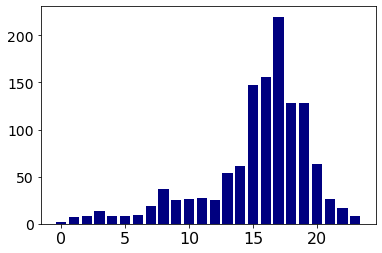

In [25]:
# sorted by hour
hour = df_dates['count'].sum(level='hour').sort_index()
plt.figure(figsize=(6, 4))
fig = plt.bar(hour.index, hour, color='navy')
plt.xticks(rotation=0.45, fontsize=16)
plt.xlabel('')
plt.savefig('img2/hour.jpg')

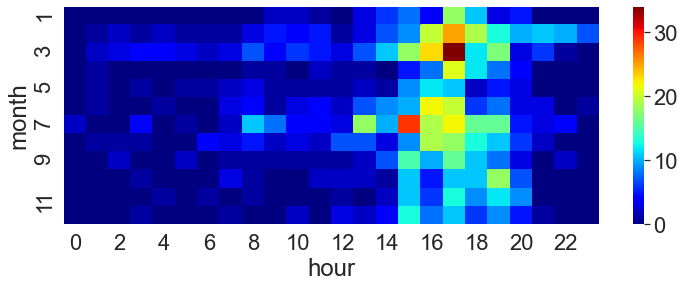

In [26]:
# heatmap by month and hour
sns.set(font_scale=2)
plt.figure(figsize=(12, 4))
sns.heatmap(df_dates['count'].sum(level=['month', 'hour']).sort_index().unstack(level='hour').fillna(0),cmap="jet") #annot=True,
plt.savefig('img2/heatmap.jpg')

In [27]:
# coin ranking average (among ranked coins)
print('The average of coin ranking: {:.5g}'.format(df['coin_ranking'][df['ranked']==1].mean()))

# unranked coin
print('The number of P&D that used unranked coins is {}'.format(df[df['ranked']==0].shape[0]))

# the types of coin
print('{} types of coins'.format(len(df['Currency'].unique())))

# most frequently pumped coin
frequent = df.groupby('Currency').sum().sort_values('count', ascending=False)
print('Most frequent coin:{}, Number:{}'.format(frequent.index[0],frequent.iloc[0]['count']))
print('The number of coins that have pumped more than twice is {}'.format(frequent[frequent['count']>1].shape[0]))

# Large cap coins
print('{} P&D uses top ranked coins'.format(df[df['coin_ranking']<10].shape[0]))

The average of coin ranking: 294.42
The number of P&D that used unranked coins is 204
376 types of coins
Most frequent coin:PPT, Number:26.0
The number of coins that have pumped more than twice is 185
23 P&D uses top ranked coins


In [28]:
df.groupby('Exchange').mean()['coin_ranking']

Exchange
Binance      317.393827
Bittrex      529.787234
Cryptopia    912.300000
Yobit        418.711111
Name: coin_ranking, dtype: float64

In [29]:
# positive return P&D
print(df[df['theoretical_return']>1].shape[0]/df.shape[0])

0.8968903436988543


In [30]:
# No. of telegram channels
print(len(df['Channel'].unique()))

114


In [31]:
# display the descriptive statistics
pd.options.display.precision = 2
var = ['theoretical_return','relative_volume','duration','ranked','yobit', 'bittrex', 'cryptopia', 'AM', 
       '2019year', '2020year', '2021year', 'volume_yobit', 'volume_cryptopia', 'volume_bittrex']
df[var].describe()

,theoretical_return,relative_volume,duration,ranked,yobit,bittrex,cryptopia,AM,2019year,2020year,2021year,volume_yobit,volume_cryptopia,volume_bittrex
count,1222.00,1.22e+03,1222.00,1222.00,1222.00,1222.00,1222.00,1222.00,1222.00,1222.00,1222.00,1.22e+03,1.22e+03,1.22e+03
mean,1.30,2.27e+07,128.54,0.83,0.18,0.04,0.11,0.15,0.38,0.26,0.17,2.28e+04,1.38e+05,1.48e+05
std,0.74,3.74e+08,191.01,0.37,0.39,0.19,0.32,0.36,0.49,0.44,0.38,2.13e+05,8.37e+05,2.49e+06
min,0.36,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00
25%,1.01,6.79e+04,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00
50%,1.03,6.85e+05,57.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00
75%,1.22,3.35e+06,175.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00e+00,0.00e+00,0.00e+00
max,9.65,1.28e+10,1401.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.07e+06,1.62e+07,6.99e+07


# 